# <div style="text-align:center">STACS Data Analyst Case Study</div>


ESGpedia regularly collects datasets from various data registries and data partners. For this case study, you will be tasked to collect and analyse data from a data registry called NABERS.  

NABERS (National Australian Built Environment Rating System) is a sustainable rating for buildings in Australia. A NABERS rating helps building owners to accurately measure and communicate the environmental performance and progress of buildings. It also identifies areas for savings and improvements. 

The data is publicly available here: https://www.nabers.gov.au/ratings/find-a-current-rating.  

Requirements: 
- Explain and show how you would automate the collection of the data from the website.  
- Carry out any data cleaning and data processing steps where necessary. 
- Present the data in an interactive dashboard to capture any insights you would like to highlight or point out. 
- Languages to use: Python/SQL 

Some guiding questions have been provided below to assist you in your analysis. Please note that these questions are not exhaustive and you are highly encouraged to generate additional questions that you believe will be relevant to the task.  

- How often should the data be collected? 
- What is the distribution of green buildings in Australia? 
- How many certificates are expiring soon? 
- What is the average rating value of each building? 

**<font size="5">Table of Content:</font>**
1. Extract data using pandas
2. Explore the data set
3. Preprocess the data set:
3.1. Check duplicate rows, 
3.2. Check missing values, 
3.3. Handle missing values, 
3.4. Normalize data
4. Data visualization: 
4.1. Data collection frequency, 
4.2. Distribution of green buildings
5. Interactive dashboard: 
5.1. Certificate expiry checker, 
5.2. Average rating of each premise

# 1. Extract data using pandas:

In [113]:

# Since the RatingRegister.csv file is often updated on the NABERS webpage, 
# the RatingRegister.csv file is downloaded and saved in my Github on 11 Feb 2024, 00:23, 
# we will use this saved and constant RatingRegister.csv file for the whole case study process.

# Must set "index_col=False", 
# or it will set the rows below PremiseID as index and mismatch all the column names to the rows below.

import pandas as pd

df = pd.read_csv('https://github.com/guanp2023/Project_STACS_Data_Analyst_Case_Study/raw/main/RatingRegister.csv', index_col=False)

df.head()


,PremiseID,PremisesName,AltPremisesName,Customer,TenancyFloorOrSuite,PremiseType,StreetNumber,StreetName,Suburb,State,...,NonRenewableElectricity_REI%,OnsitePVCapacity_kW,OnsiteRenewableElectricity_kWh,OnsiteRenewableElectricity_REI%,RETandStateTerritoryTargets_kWh,RETandStateTerritorytargets_REI%,GreenPower_kWh,GreenPower_REI%,OtherVoluntaryPurchases_kWh,OtherVoluntaryPurchases_REI%
0,P0005,Charles Darwin Centre,Charles Darwin Centre,PASPALEY PEARLS PROPERTIES PTY LTD,NaN,Office,19,The Mall,DARWIN CITY,NT,...,71.5,100.0,148977.81,8.7,283248.34,16.5,0.0,0.0,0.0,0.0
1,P0007,677 The Boulevard,60 Pitt St,DEXUS FUNDS MANAGEMENT LIMITED,NaN,Office,NaN,677 The Boulevard,EAGLEMONT,VIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P0007,677 The Boulevard,60 Pitt St,DEXUS FUNDS MANAGEMENT LIMITED,NaN,Office,NaN,677 The Boulevard,EAGLEMONT,VIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P0010,The Gateway,The Gateway,SPARTOHORI PTY LTD,NaN,Office,168,Parry Street,NEWCASTLE WEST,NSW,...,81.1,NaN,0.00,0.0,40280.69,18.9,0.0,0.0,0.0,0.0
4,P0010,The Gateway,The Gateway,SPARTOHORI PTY LTD,NaN,Office,168,Parry Street,NEWCASTLE WEST,NSW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:

# We don't use the method in this cell, see the reasons below,
# reason1: the response time is too long,
# reason2: the "RatingRegister.csv" file is often updated in the NABERS webpage, it would impact the following data analysis.

# The following method uses Request and BeautifulSoup libraries to scrape the "RatingRegister.csv" file.
# Request sends HTTP request to the url, "https://www.nabers.gov.au/ratings/find-a-current-rating?premise=5590".
# BeautifulSoup parses and finds the "RatingRegister.csv" file in the webpage HTML.

'''

# Import required libraries:
import requests
from bs4 import BeautifulSoup

# get url:
url = "https://www.nabers.gov.au/ratings/find-a-current-rating?premise=5590"

# Send HTTP requests to get webpage:
response = requests.get(url)

# Use BeautifulSoup to parse the HTML content:
soup = BeautifulSoup(response.content, 'html.parser')

# Find <a> tag, it includes the 'RatingRegister.csv' file's link (url):
download_link = soup.find('a', {'href': 'https://nabersstorage.blob.core.windows.net/registers/RatingRegister.csv'})

# Get the 'RatingRegister.csv' file's link (url):
file_url = download_link['href']

# Send HTTP requests to get 'RatingRegister.csv' file:
file_response = requests.get(file_url)

# Save the 'RatingRegister.csv' file:
csv_filename = "RatingRegister.csv"
with open(csv_filename, 'wb') as file:
    file.write(file_response.content)

# Use Pandas to read the 'RatingRegister.csv' file:    
df = pd.read_csv(csv_filename)

'''


'\n\n# Import required libraries:\nimport requests\nfrom bs4 import BeautifulSoup\n\n# get url:\nurl = "https://www.nabers.gov.au/ratings/find-a-current-rating?premise=5590"\n\n# Send HTTP requests to get webpage:\nresponse = requests.get(url)\n\n# Use BeautifulSoup to parse the HTML content:\nsoup = BeautifulSoup(response.content, \'html.parser\')\n\n# Find <a> tag, it includes the \'RatingRegister.csv\' file\'s link (url):\ndownload_link = soup.find(\'a\', {\'href\': \'https://nabersstorage.blob.core.windows.net/registers/RatingRegister.csv\'})\n\n# Get the \'RatingRegister.csv\' file\'s link (url):\nfile_url = download_link[\'href\']\n\n# Send HTTP requests to get \'RatingRegister.csv\' file:\nfile_response = requests.get(file_url)\n\n# Save the \'RatingRegister.csv\' file:\ncsv_filename = "RatingRegister.csv"\nwith open(csv_filename, \'wb\') as file:\n    file.write(file_response.content)\n\n# Use Pandas to read the \'RatingRegister.csv\' file:    \ndf = pd.read_csv(csv_filename)\n

# 2. Explore the data set: 

In [115]:
df.shape

(3633, 85)

In [116]:
df.columns

Index(['PremiseID', 'PremisesName', 'AltPremisesName', 'Customer',
       'TenancyFloorOrSuite', 'PremiseType', 'StreetNumber', 'StreetName',
       'Suburb', 'State', 'Postcode', 'Latitude', 'Longitude',
       'RatingReferenceNumber', 'RatingType', 'RatingScope',
       'CertificateValidTo', 'EnergyStarRatingValue',
       'EnergyGPStarRatingValueNoGP', 'EnergyGreenPowerPercent',
       'EnergyGreenPower', 'WasteStarRatingValue', 'IEQStarRatingValue',
       'GHGEmissionsScope123WithRenewableElectricity',
       'GHGEmissionsScope123WithoutRenewableElectricity',
       'GHGEmissionsScope123PerM2WithRenewableElectricity',
       'GHGEmissionsScope123PerM2WithoutRenewableElectricity',
       'EnergyIntensityByM2', 'EnergyIntensityByRoom',
       'GHGEmissionsScope123PerRoom', 'GHGEmissionsScope123PerRoomNoGP',
       'TotalEnergyUse', 'CarbonNeutral', 'CarbonNeutralExpiryDate',
       'AAAStarRatingValue', 'DataCentre_PUE', 'HospitalPeerGroup',
       'School_SubSector', 'WaterStarRati

In [117]:
df.dtypes

PremiseID                            object
PremisesName                         object
AltPremisesName                      object
Customer                             object
TenancyFloorOrSuite                  object
                                     ...   
RETandStateTerritorytargets_REI%    float64
GreenPower_kWh                      float64
GreenPower_REI%                     float64
OtherVoluntaryPurchases_kWh         float64
OtherVoluntaryPurchases_REI%        float64
Length: 85, dtype: object

In [118]:
df.dtypes.value_counts()

float64    66
object     18
int64       1
Name: count, dtype: int64

In [119]:
df['PremiseID'].value_counts() # Some PremiseIDs appear more than once.

PremiseID
P3162    13
P0126    11
P3109    10
P0200     9
P0835     9
         ..
P4628     1
P0618     1
P0617     1
P4632     1
P0005     1
Name: count, Length: 2079, dtype: int64

In [120]:
df['RatingType'].value_counts() # 'RatingType' column is important in the following data analysis.

RatingType
Energy    2348
Water     1285
Name: count, dtype: int64

In [121]:
df['EnergyStarRatingValue'].mean()

4.608603066439523

In [122]:
df['EnergyStarRatingValue'].value_counts()

EnergyStarRatingValue
5.0    544
5.5    451
4.5    369
6.0    327
4.0    254
3.5    131
3.0     90
2.5     63
0.0     58
2.0     28
1.0     19
1.5     14
Name: count, dtype: int64

In [123]:
df['WaterStarRatingValue'].mean()

4.266147859922179

In [124]:
df['WaterStarRatingValue'].value_counts()

WaterStarRatingValue
4.5    321
4.0    202
5.0    195
5.5    134
3.5    119
6.0    110
3.0     88
2.5     42
0.0     29
1.5     18
2.0     18
1.0      9
Name: count, dtype: int64

# 3. Preprocess the data set:

In [125]:
df

,PremiseID,PremisesName,AltPremisesName,Customer,TenancyFloorOrSuite,PremiseType,StreetNumber,StreetName,Suburb,State,...,NonRenewableElectricity_REI%,OnsitePVCapacity_kW,OnsiteRenewableElectricity_kWh,OnsiteRenewableElectricity_REI%,RETandStateTerritoryTargets_kWh,RETandStateTerritorytargets_REI%,GreenPower_kWh,GreenPower_REI%,OtherVoluntaryPurchases_kWh,OtherVoluntaryPurchases_REI%
0,P0005,Charles Darwin Centre,Charles Darwin Centre,PASPALEY PEARLS PROPERTIES PTY LTD,NaN,Office,19,The Mall,DARWIN CITY,NT,...,71.5,100.0,148977.81,8.7,283248.34,16.5,0.0,0.0,0.0,0.0
1,P0007,677 The Boulevard,60 Pitt St,DEXUS FUNDS MANAGEMENT LIMITED,NaN,Office,NaN,677 The Boulevard,EAGLEMONT,VIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P0007,677 The Boulevard,60 Pitt St,DEXUS FUNDS MANAGEMENT LIMITED,NaN,Office,NaN,677 The Boulevard,EAGLEMONT,VIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P0010,The Gateway,The Gateway,SPARTOHORI PTY LTD,NaN,Office,168,Parry Street,NEWCASTLE WEST,NSW,...,81.1,NaN,0.00,0.0,40280.69,18.9,0.0,0.0,0.0,0.0
4,P0010,The Gateway,The Gateway,SPARTOHORI PTY LTD,NaN,Office,168,Parry Street,NEWCASTLE WEST,NSW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3628,P7778,80 SCHNEIDER RD EAGLE FARM,80 SCHNEIDER RD EAGLE FARM,Camp Seabee Properties Pty Ltd,NaN,Office,80,SCHNEIDER RD,EAGLE FARM,QLD,...,81.1,NaN,0.00,0.0,242172.73,18.9,0.0,0.0,0.0,0.0
3629,P7784,Holly Aged Care,Holly Aged Care,Perpetual Nominees Limited,NaN,Residential aged care,16,PENNEYS HILL RD,HACKHAM,SA,...,50.5,NaN,0.00,0.0,139537.55,11.7,0.0,0.0,0.0,0.0
3630,P7784,Holly Aged Care,Holly Aged Care,Perpetual Nominees Limited,NaN,Residential aged care,16,PENNEYS HILL RD,HACKHAM,SA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3631,P7786,80 Collins Street - South Tower,80 Collins Street - South Tower,The trustee for QIC 80 Collins Street Trust,NaN,Office,80,Collins Street,MELBOURNE,VIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3.1. Check duplicate rows:

In [126]:
duplicate_row_check = df.duplicated()
duplicate_row_check

0       False
1       False
2       False
3       False
4       False
        ...  
3628    False
3629    False
3630    False
3631    False
3632    False
Length: 3633, dtype: bool

In [127]:
duplicate_row_check.value_counts()

False    3633
Name: count, dtype: int64

In [128]:
# Based on the result of the duplicate row check above, there are no duplicate rows in the data frame (df),

#df = df.drop_duplicates()

In [129]:
df.shape

(3633, 85)

## 3.2. Check missing values:

In [130]:

# Check the missing values in all columns:

missing_value_check = df

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

missing_value_check = missing_value_check.count().to_frame().rename(columns={0: 'Filled Rows'}) 
missing_value_check


,Filled Rows
PremiseID,3633
PremisesName,3633
AltPremisesName,3342
Customer,3633
TenancyFloorOrSuite,308
PremiseType,3633
StreetNumber,3553
StreetName,3633
Suburb,3633
State,3633


In [131]:

# The data frame (df) has 3633 rows and 85 colunms in total, based on the missing value check result above.


# Some columns are fully filled with 3633 values, 
# some columns are partially filled with less than 3633 values, 
# some columns are completely not filled with 0 values. 


# Some columns are totally empty or unnecessary for the following data analysis, 
# we would not use these unnecessary columns and only use the necessary columns. 


# Columns 'CertificateValidTo', 'EnergyStarRatingValue', 'WaterStarRatingValue', 'Latitude', and 'Longitud'.  
# The columns mentioned above are necessary for the following data analysis,
# we would focus on the missing values in these columns.


#1 CertificateValidTo column:
# CertificateValidTo column is fully filled and has no rows with missing values (NaN).


#2 EnergyStarRatingValue colunm:
# EnergyStarRatingValue colunm has 3633-2348=1285 rows with missing values (NaN), 
# it is reasonable since the premise's RatingType is either 'Energy' or 'Water', this column is for energy rating, so it has 2348 filled rows (energy rating) and 1285 empty rows (water rating).


#3 WaterStarRatingValue colunm:
# WaterStarRatingValue colunm has 3633-1285=2348 rows with missing values (NaN), 
# it is reasonable since the premise's RatingType is either 'Energy' or 'Water', this column is for water rating, so it has 1285 filled rows (water rating) and 2348 empty rows (energy rating).


#4 Latitude and Longitude columns:
# Latitude and Longitude columns, each has 3633-3604=29 rows with missing values (NaN), 
# actually there are 3 rows containing 0.0 in each Latitude and Longitude column, the 0.0 is an invalid value, 
# we would handle these 29+3=32 missing (NaN) or invalid (0.0) values in each Latitude and Longitude column in part 3.3 below.


## 3.3. Handle missing values:

In [132]:
# Handle the missing (NaN) and invalid (0.0) values in each Latitude and Longitude column.

# There are 29 rows with missing values (NaN) in each Latitude and Longitude column.
# There are 3 rows containing 0.0 which is an invalid value in each Latitude and Longitude column.
# Filter the data frame (df) and generate the df_lat_long_miss to see all of these 29+3=32 rows below:

df_lat_long_miss = df[(df['Latitude'].isna()) | (df['Latitude'] == 0) | (df['Longitude'].isna()) | (df['Longitude'] == 0)]
df_lat_long_miss = df_lat_long_miss[['StreetNumber', 'StreetName', 'Suburb', 'State', 'Postcode', 'Latitude', 'Longitude']]
df_lat_long_miss


,StreetNumber,StreetName,Suburb,State,Postcode,Latitude,Longitude
2136,570,Swan Street,BURNLEY,VIC,3121,NaN,NaN
2137,570,Swan Street,BURNLEY,VIC,3121,NaN,NaN
2138,NaN,900 Ann Street,Fortitude Valley,QLD,4006,NaN,NaN
2139,NaN,900 Ann Street,Fortitude Valley,QLD,4006,NaN,NaN
2140,NaN,130 Lonsdale Street,Melbourne,VIC,3000,NaN,NaN
2141,NaN,130 Lonsdale Street,Melbourne,VIC,3000,NaN,NaN
2142,NaN,130 Lonsdale Street,Melbourne,VIC,3000,NaN,NaN
2143,NaN,130 Lonsdale Street,Melbourne,VIC,3000,NaN,NaN
2144,NaN,130 Lonsdale Street,Melbourne,VIC,3000,NaN,NaN
2145,NaN,130 Lonsdale Street,Melbourne,VIC,3000,NaN,NaN


In [133]:
# There are 29 rows with missing values (NaN) in each Latitude and Longitude column.
# There are 3 rows containing 0.0 which is an invalid value in each Latitude and Longitude column.
# There are 29+3=32 missing (NaN) or invalid (0.0) values in each Latitude and Longitude column.

df_lat_long_miss.shape


(32, 7)

In [134]:
# To handle the missing (NaN) and invalid (0.0) values in each Latitude and Longitude column,
# in the data frame (df), add a new coloum 'FullAddress' which concatenates all the info in columns 'StreetNumber', 'StreetName', 'Suburb', 'State', and 'Postcode'.

df['FullAddress'] = df['StreetNumber'].fillna('').astype(str) + ' ' + df['StreetName'] + ' ' + df['Suburb'] + ' ' + df['State'] + ' ' + df['Postcode'].astype(str)

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

df


,PremiseID,PremisesName,AltPremisesName,Customer,TenancyFloorOrSuite,PremiseType,StreetNumber,StreetName,Suburb,State,...,OnsitePVCapacity_kW,OnsiteRenewableElectricity_kWh,OnsiteRenewableElectricity_REI%,RETandStateTerritoryTargets_kWh,RETandStateTerritorytargets_REI%,GreenPower_kWh,GreenPower_REI%,OtherVoluntaryPurchases_kWh,OtherVoluntaryPurchases_REI%,FullAddress
0,P0005,Charles Darwin Centre,Charles Darwin Centre,PASPALEY PEARLS PROPERTIES PTY LTD,NaN,Office,19,The Mall,DARWIN CITY,NT,...,100.0,148977.81,8.7,283248.34,16.5,0.0,0.0,0.0,0.0,19 The Mall DARWIN CITY NT 800
1,P0007,677 The Boulevard,60 Pitt St,DEXUS FUNDS MANAGEMENT LIMITED,NaN,Office,NaN,677 The Boulevard,EAGLEMONT,VIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,677 The Boulevard EAGLEMONT VIC 3084
2,P0007,677 The Boulevard,60 Pitt St,DEXUS FUNDS MANAGEMENT LIMITED,NaN,Office,NaN,677 The Boulevard,EAGLEMONT,VIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,677 The Boulevard EAGLEMONT VIC 3084
3,P0010,The Gateway,The Gateway,SPARTOHORI PTY LTD,NaN,Office,168,Parry Street,NEWCASTLE WEST,NSW,...,NaN,0.00,0.0,40280.69,18.9,0.0,0.0,0.0,0.0,168 Parry Street NEWCASTLE WEST NSW 2302
4,P0010,The Gateway,The Gateway,SPARTOHORI PTY LTD,NaN,Office,168,Parry Street,NEWCASTLE WEST,NSW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168 Parry Street NEWCASTLE WEST NSW 2302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3628,P7778,80 SCHNEIDER RD EAGLE FARM,80 SCHNEIDER RD EAGLE FARM,Camp Seabee Properties Pty Ltd,NaN,Office,80,SCHNEIDER RD,EAGLE FARM,QLD,...,NaN,0.00,0.0,242172.73,18.9,0.0,0.0,0.0,0.0,80 SCHNEIDER RD EAGLE FARM QLD 4009
3629,P7784,Holly Aged Care,Holly Aged Care,Perpetual Nominees Limited,NaN,Residential aged care,16,PENNEYS HILL RD,HACKHAM,SA,...,NaN,0.00,0.0,139537.55,11.7,0.0,0.0,0.0,0.0,16 PENNEYS HILL RD HACKHAM SA 5163
3630,P7784,Holly Aged Care,Holly Aged Care,Perpetual Nominees Limited,NaN,Residential aged care,16,PENNEYS HILL RD,HACKHAM,SA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16 PENNEYS HILL RD HACKHAM SA 5163
3631,P7786,80 Collins Street - South Tower,80 Collins Street - South Tower,The trustee for QIC 80 Collins Street Trust,NaN,Office,80,Collins Street,MELBOURNE,VIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80 Collins Street MELBOURNE VIC 3000


In [135]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [136]:

# Based on the info in coloum 'FullAddress', 
# we can use Nominatim in geopy library to find the corresponding latitude and longitude values,
# and fill the corresponding latitude and longitude values into the rows with missing (NaN) or invalid (0.0) values in each Latitude and Longitude column.

# Import required libraries:
from geopy.geocoders import Nominatim
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

# Creating a Geocoder:
geolocator = Nominatim(user_agent="my_geocoder")

# Adding Timeout and Retry Attempts:
retry_strategy = Retry(
    total=3,
    backoff_factor=2,
    status_forcelist=[429, 500, 502, 503, 504],
)
adapter = HTTPAdapter(max_retries=retry_strategy)
http = requests.Session()
http.mount("https://", adapter)

geolocator.session = http

# Using Geocoding to Populate 'Latitude' and 'Longitude' Columns:
for index, row in df.iterrows():
    # (df['Latitude'].isna()) | (df['Latitude'] == 0) | (df['Longitude'].isna()) | (df['Longitude'] == 0)
    if (pd.isna(row['Latitude'])) or (row['Latitude'] == 0) or (pd.isna(row['Longitude'])) or (row['Longitude'] == 0):
        try:
            location = geolocator.geocode(row['FullAddress'], timeout=10)
            if location:
                df.at[index, 'Latitude'] = location.latitude
                df.at[index, 'Longitude'] = location.longitude
        except requests.exceptions.Timeout:
            print(f"Timeout error for index {index}, FullAddress: {row['FullAddress']}")
        except Exception as e:
            print(f"Error for index {index}: {e}")

df


,PremiseID,PremisesName,AltPremisesName,Customer,TenancyFloorOrSuite,PremiseType,StreetNumber,StreetName,Suburb,State,...,OnsitePVCapacity_kW,OnsiteRenewableElectricity_kWh,OnsiteRenewableElectricity_REI%,RETandStateTerritoryTargets_kWh,RETandStateTerritorytargets_REI%,GreenPower_kWh,GreenPower_REI%,OtherVoluntaryPurchases_kWh,OtherVoluntaryPurchases_REI%,FullAddress
0,P0005,Charles Darwin Centre,Charles Darwin Centre,PASPALEY PEARLS PROPERTIES PTY LTD,NaN,Office,19,The Mall,DARWIN CITY,NT,...,100.0,148977.81,8.7,283248.34,16.5,0.0,0.0,0.0,0.0,19 The Mall DARWIN CITY NT 800
1,P0007,677 The Boulevard,60 Pitt St,DEXUS FUNDS MANAGEMENT LIMITED,NaN,Office,NaN,677 The Boulevard,EAGLEMONT,VIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,677 The Boulevard EAGLEMONT VIC 3084
2,P0007,677 The Boulevard,60 Pitt St,DEXUS FUNDS MANAGEMENT LIMITED,NaN,Office,NaN,677 The Boulevard,EAGLEMONT,VIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,677 The Boulevard EAGLEMONT VIC 3084
3,P0010,The Gateway,The Gateway,SPARTOHORI PTY LTD,NaN,Office,168,Parry Street,NEWCASTLE WEST,NSW,...,NaN,0.00,0.0,40280.69,18.9,0.0,0.0,0.0,0.0,168 Parry Street NEWCASTLE WEST NSW 2302
4,P0010,The Gateway,The Gateway,SPARTOHORI PTY LTD,NaN,Office,168,Parry Street,NEWCASTLE WEST,NSW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168 Parry Street NEWCASTLE WEST NSW 2302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3628,P7778,80 SCHNEIDER RD EAGLE FARM,80 SCHNEIDER RD EAGLE FARM,Camp Seabee Properties Pty Ltd,NaN,Office,80,SCHNEIDER RD,EAGLE FARM,QLD,...,NaN,0.00,0.0,242172.73,18.9,0.0,0.0,0.0,0.0,80 SCHNEIDER RD EAGLE FARM QLD 4009
3629,P7784,Holly Aged Care,Holly Aged Care,Perpetual Nominees Limited,NaN,Residential aged care,16,PENNEYS HILL RD,HACKHAM,SA,...,NaN,0.00,0.0,139537.55,11.7,0.0,0.0,0.0,0.0,16 PENNEYS HILL RD HACKHAM SA 5163
3630,P7784,Holly Aged Care,Holly Aged Care,Perpetual Nominees Limited,NaN,Residential aged care,16,PENNEYS HILL RD,HACKHAM,SA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16 PENNEYS HILL RD HACKHAM SA 5163
3631,P7786,80 Collins Street - South Tower,80 Collins Street - South Tower,The trustee for QIC 80 Collins Street Trust,NaN,Office,80,Collins Street,MELBOURNE,VIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80 Collins Street MELBOURNE VIC 3000


In [137]:

'''
# We don't use this cell as it is easy to reach the max retries (geopy, Nominatim) and return a TimeoutError.

# Based on the info in coloum 'FullAddress', 
# we can use Nominatim in geopy library to find the corresponding latitude and longitude values,
# and fill the corresponding latitude and longitude values into the rows with missing (NaN) or invalid (0.0) values in each Latitude and Longitude column.

from geopy.geocoders import Nominatim

# Create geocoder object:
geolocator = Nominatim(user_agent="my_geocoder")

# Use the geocoder object fill missing latitude and Longitude
for index, row in df.iterrows():
    if (pd.isna(row['Latitude'])) | (row['Latitude'] == 0) | (pd.isna(row['Longitude'])) | (row['Longitude'] == 0):
        location = geolocator.geocode(row['FullAddress'])
        if location:
            df.at[index, 'Latitude'] = location.latitude
            df.at[index, 'Longitude'] = location.longitude

df

'''


'\n# We don\'t use this cell as it is easy to reach the max retries (geopy, Nominatim) and return a TimeoutError.\n\n# Based on the info in coloum \'FullAddress\', \n# we can use Nominatim in geopy library to find the corresponding latitude and longitude values,\n# and fill the corresponding latitude and longitude values into the rows with missing (NaN) or invalid (0.0) values in each Latitude and Longitude column.\n\nfrom geopy.geocoders import Nominatim\n\n# Create geocoder object:\ngeolocator = Nominatim(user_agent="my_geocoder")\n\n# Use the geocoder object fill missing latitude and Longitude\nfor index, row in df.iterrows():\n    if (pd.isna(row[\'Latitude\'])) | (row[\'Latitude\'] == 0) | (pd.isna(row[\'Longitude\'])) | (row[\'Longitude\'] == 0):\n        location = geolocator.geocode(row[\'FullAddress\'])\n        if location:\n            df.at[index, \'Latitude\'] = location.latitude\n            df.at[index, \'Longitude\'] = location.longitude\n\ndf\n\n'

In [138]:

# Check if all missing (NaN) and invalid (0.0) values are filled in each Latitude and Longitude column.

df[(df['Latitude'].isna()) | (df['Latitude'] == 0) | (df['Longitude'].isna()) | (df['Longitude'] == 0)]


,PremiseID,PremisesName,AltPremisesName,Customer,TenancyFloorOrSuite,PremiseType,StreetNumber,StreetName,Suburb,State,...,OnsitePVCapacity_kW,OnsiteRenewableElectricity_kWh,OnsiteRenewableElectricity_REI%,RETandStateTerritoryTargets_kWh,RETandStateTerritorytargets_REI%,GreenPower_kWh,GreenPower_REI%,OtherVoluntaryPurchases_kWh,OtherVoluntaryPurchases_REI%,FullAddress
3494,P7578,Building no. G312,Building no. G312,Department of Defence,NaN,Office,NaN,Macquarie Dr Holsworthy,Barracks Holsworthy,NSW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Macquarie Dr Holsworthy Barracks Holsworthy N...
3495,P7579,Building no. G242,Building no. G242,Department of Defence,NaN,Office,NaN,Macquarie Drive Holsworthy,Barracks Holsworthy,NSW,...,NaN,0.0,0.0,19267.55,17.3,0.0,0.0,0.0,0.0,Macquarie Drive Holsworthy Barracks Holsworth...
3496,P7579,Building no. G242,Building no. G242,Department of Defence,NaN,Office,NaN,Macquarie Drive Holsworthy,Barracks Holsworthy,NSW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Macquarie Drive Holsworthy Barracks Holsworth...


In [139]:

# Based on the check result above, there are still 3 missing value (NaN) rows in each Latitude and Longitude column,
# drop these 3 rows, since these 3 rows did not provide a Street Number, the latitude and longitude values cannot be extracted.

df = df.drop([3494, 3495, 3496], axis='index')
df = df.reset_index()
df


,index,PremiseID,PremisesName,AltPremisesName,Customer,TenancyFloorOrSuite,PremiseType,StreetNumber,StreetName,Suburb,...,OnsitePVCapacity_kW,OnsiteRenewableElectricity_kWh,OnsiteRenewableElectricity_REI%,RETandStateTerritoryTargets_kWh,RETandStateTerritorytargets_REI%,GreenPower_kWh,GreenPower_REI%,OtherVoluntaryPurchases_kWh,OtherVoluntaryPurchases_REI%,FullAddress
0,0,P0005,Charles Darwin Centre,Charles Darwin Centre,PASPALEY PEARLS PROPERTIES PTY LTD,NaN,Office,19,The Mall,DARWIN CITY,...,100.0,148977.81,8.7,283248.34,16.5,0.0,0.0,0.0,0.0,19 The Mall DARWIN CITY NT 800
1,1,P0007,677 The Boulevard,60 Pitt St,DEXUS FUNDS MANAGEMENT LIMITED,NaN,Office,NaN,677 The Boulevard,EAGLEMONT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,677 The Boulevard EAGLEMONT VIC 3084
2,2,P0007,677 The Boulevard,60 Pitt St,DEXUS FUNDS MANAGEMENT LIMITED,NaN,Office,NaN,677 The Boulevard,EAGLEMONT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,677 The Boulevard EAGLEMONT VIC 3084
3,3,P0010,The Gateway,The Gateway,SPARTOHORI PTY LTD,NaN,Office,168,Parry Street,NEWCASTLE WEST,...,NaN,0.00,0.0,40280.69,18.9,0.0,0.0,0.0,0.0,168 Parry Street NEWCASTLE WEST NSW 2302
4,4,P0010,The Gateway,The Gateway,SPARTOHORI PTY LTD,NaN,Office,168,Parry Street,NEWCASTLE WEST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168 Parry Street NEWCASTLE WEST NSW 2302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,3628,P7778,80 SCHNEIDER RD EAGLE FARM,80 SCHNEIDER RD EAGLE FARM,Camp Seabee Properties Pty Ltd,NaN,Office,80,SCHNEIDER RD,EAGLE FARM,...,NaN,0.00,0.0,242172.73,18.9,0.0,0.0,0.0,0.0,80 SCHNEIDER RD EAGLE FARM QLD 4009
3626,3629,P7784,Holly Aged Care,Holly Aged Care,Perpetual Nominees Limited,NaN,Residential aged care,16,PENNEYS HILL RD,HACKHAM,...,NaN,0.00,0.0,139537.55,11.7,0.0,0.0,0.0,0.0,16 PENNEYS HILL RD HACKHAM SA 5163
3627,3630,P7784,Holly Aged Care,Holly Aged Care,Perpetual Nominees Limited,NaN,Residential aged care,16,PENNEYS HILL RD,HACKHAM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16 PENNEYS HILL RD HACKHAM SA 5163
3628,3631,P7786,80 Collins Street - South Tower,80 Collins Street - South Tower,The trustee for QIC 80 Collins Street Trust,NaN,Office,80,Collins Street,MELBOURNE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80 Collins Street MELBOURNE VIC 3000


## 3.4. Normalize data: 

In [140]:

# Normalization is the process of transforming values of several variables into a similar range. 
# For example, scaling the variable, so the variable values range from 0 to 1.
# In the data frame (df), we would use the following two variables for data analysis as follows,
# the values in the following two variables are from 0 to 6, it is unnecessary to scale (normalize) the values (data).

df[['EnergyStarRatingValue', 'WaterStarRatingValue']].describe()


,EnergyStarRatingValue,WaterStarRatingValue
count,2346.000000,1284.000000
mean,4.608909,4.264798
std,1.247757,1.205492
min,0.000000,0.000000
25%,4.000000,3.500000
50%,5.000000,4.500000
75%,5.500000,5.000000
max,6.000000,6.000000


# 4. Data visualization:

## 4.1. Data collection frequency: 

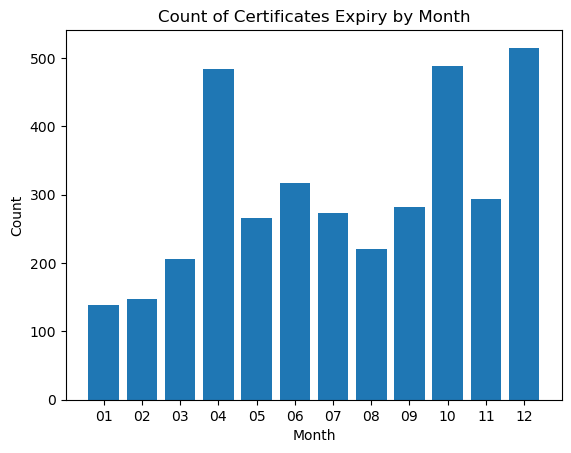

In [141]:
import matplotlib.pyplot as plt

# Slice the 'months' from the dataframe (df):
df['Month'] = df['CertificateValidTo'].str[3:5]

# Get the counts of each month:
month_counts = df['Month'].value_counts().sort_index()
month_counts

# Plot a bar chart:
plt.bar(month_counts.index, month_counts.values)

# Add labels and title:
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Certificates Expiry by Month')

# Show the bar chart:
plt.show()


In [142]:

# Based on the bar chart above,
# we would recommend to collect the data monthly,
# as there are hundreds of certificates expiring in every month (Apr, Oct, and Dec each has around 500 expiry cases),
# the ratings would need to be redone after the certificate expiry.


## 4.2. Distribution of green buildings

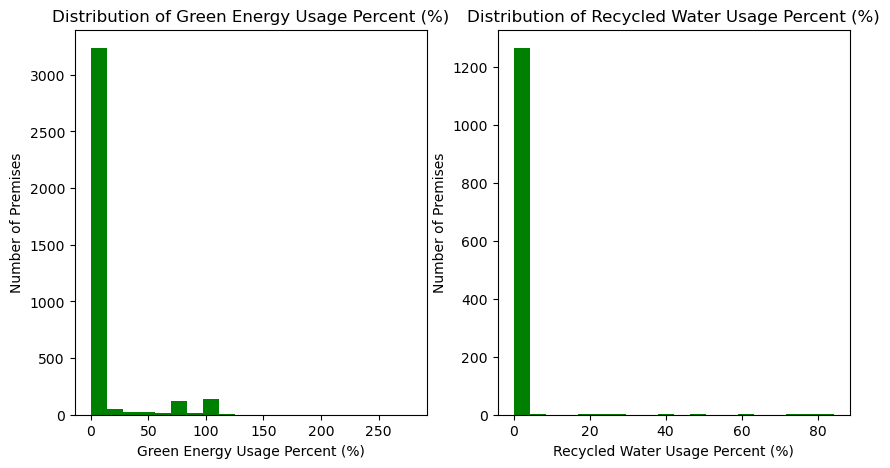

In [143]:

# A green building is a building that, in its design, construction and operation, reduces or eliminates negative impact. 
# It can also create positive impact on our climate. 
# Green buildings provide many benefits to building occupants, such as reduced usage of energy and water, 
# improved ventilation and indoor air quality, which can lead to better health and wellbeing. 
# Source: Building and Construction Authority (BCA)

# What is the distribution of green buildings in Australia? 
# We assume the green buildings are classified by the percent of green energy usage or the percent of recycled water usage for a premise.
# The following left histogram shows the distribution (number) of premises in terms of the percent of green energy usage.     
# The following right histogram shows the distribution (number) of premises in terms of the percent of recycled water usage. 


import matplotlib.pyplot as plt

# Select the required columns for histogram plots
df_EnergyG = df[['EnergyGreenPowerPercent']]
df_WaterR = df[['WaterRecycledPercent']]

# Create one figure (canvas) including two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# ax1: Histogram of Energy Green Power Percent (%)
ax1.hist(df_EnergyG, color='green', bins=20) 
ax1.set_title('Distribution of Green Energy Usage Percent (%)')
ax1.set_xlabel('Green Energy Usage Percent (%)')
ax1.set_ylabel('Number of Premises')

# ax2: Histogram of Water Recycled Percent (%)
ax2.hist(df_WaterR, color='green', bins=20)
ax2.set_title('Distribution of Recycled Water Usage Percent (%)')
ax2.set_xlabel('Recycled Water Usage Percent (%)')
ax2.set_ylabel('Number of Premises')

# plt.suptitle('Overall Title')

plt.show()


In [144]:

# We assume the premises with greater than 80% of green energy usage are deemed as green buildings.

green_building_num_energy = df_EnergyG[df_EnergyG['EnergyGreenPowerPercent'] > 80].shape[0]
print('The number of premises deemed as green building per green energy usage percent: ', green_building_num_energy)


The number of premises deemed as green building per green energy usage percent:  260


In [145]:

# We assume the premises with greater than 60% of recycled water usage are deemed as green buildings.

green_building_num_water = df_WaterR[df_WaterR['WaterRecycledPercent'] > 60].shape[0]
print('The number of premises deemed as green building per recycled water usage percent: ', green_building_num_water)


The number of premises deemed as green building per recycled water usage percent:  7


# 5. Interactive dashboard:

## 5.1. Certificate expiry checker:

In [147]:

# The Certificate expiry checker can help users to check the certificates that are expired in an entered date.
# The checker can provide the information on the premises' address, certificate validation, map location, etc.
# You can enter a recent date (e.g. 20/02/2024) to see how many certificates are expiring on that date in the checker.

# Import required libraries:
from datetime import datetime
import folium
from IPython.display import display

# Create an interactive dialog box to enter a date:
EnterCertificateValidTo = input('Enter a date in DD/MM/YYYY format: ')

# Filter the dataframe (df) to get df_cert for the following usage:
df_cert = df[df['CertificateValidTo'] == EnterCertificateValidTo].copy()    

# Create a table and display it:
df_cert['CertificateValidTo[YYYY-MM-DD]'] = pd.to_datetime(df_cert['CertificateValidTo'], format='%d/%m/%Y')
current_date = datetime.now()
df_cert['ExpiryInDays'] = (df_cert['CertificateValidTo[YYYY-MM-DD]'] - current_date).dt.days + 1
df_cert.loc[df_cert['ExpiryInDays'] < 0, 'ExpiryInDays'] = 'Expired'
df_cert = df_cert[['PremiseID', 'FullAddress', 'Latitude', 'Longitude', 'RatingType', 'CertificateValidTo', 'ExpiryInDays']]
df_cert = df_cert.reset_index()
display(df_cert)

# Create a map and display it:
AusMap = folium.Map(location=[-25.58250436416569, 134.57711015532726], zoom_start=4)
for index, row in df_cert.iterrows():
    latitude, longitude = row['Latitude'], row['Longitude']    
    folium.Marker(location=[latitude, longitude], popup=f"PremiseID: {row['PremiseID']} Certificate Expiry Date: {row['CertificateValidTo']}").add_to(AusMap)
display(AusMap)


Enter a date in DD/MM/YYYY format: 20/02/2024


,index,PremiseID,FullAddress,Latitude,Longitude,RatingType,CertificateValidTo,ExpiryInDays
0,255,P0201,165 Fitzroy St ST KILDA VIC 3182,-37.858574,144.979905,Energy,20/02/2024,5
1,2550,P4497,34 Queen Street MELBOURNE VIC 3000,-37.818016,144.962370,Energy,20/02/2024,5
2,2570,P4572,8 Exhibition Street MELBOURNE VIC 3000,-37.815693,144.972659,Energy,20/02/2024,5
3,2664,P4880,47 Kings Avenue BARTON ACT 2600,-35.304292,149.135326,Energy,20/02/2024,5


## 5.2. Average rating of each premise:

In [148]:

# What is the average rating value of each premise? 
# We would use the values in columns 'EnergyStarRatingValue' and 'WaterStarRatingValue' to calculate the average ratings for energy and water.
# Display the following columns:

df_EWStar_Rating = df[['PremiseID', 'RatingType', 'EnergyStarRatingValue', 'WaterStarRatingValue', 'CertificateValidTo']]
df_EWStar_Rating


,PremiseID,RatingType,EnergyStarRatingValue,WaterStarRatingValue,CertificateValidTo
0,P0005,Energy,5.0,NaN,12/09/2024
1,P0007,Energy,0.0,NaN,15/05/2024
2,P0007,Water,NaN,1.5,15/05/2024
3,P0010,Energy,5.5,NaN,24/12/2024
4,P0010,Water,NaN,4.5,24/12/2024
...,...,...,...,...,...
3625,P7778,Energy,3.5,NaN,27/01/2025
3626,P7784,Energy,4.5,NaN,28/12/2024
3627,P7784,Water,NaN,2.5,28/12/2024
3628,P7786,Energy,4.5,NaN,27/04/2024


In [149]:
# Some PremiseIDs may have more than one 'EnergyStarRatingValue' or 'WaterStarRatingValue' values.
# For example, PremiseID: P3162

df_EWStar_Rating[df_EWStar_Rating['PremiseID'] == 'P3162']


,PremiseID,RatingType,EnergyStarRatingValue,WaterStarRatingValue,CertificateValidTo
2073,P3162,Energy,6.0,NaN,31/05/2024
2074,P3162,Energy,5.0,NaN,27/10/2024
2075,P3162,Water,NaN,4.5,27/10/2024
2076,P3162,Energy,6.0,NaN,27/10/2024
2077,P3162,Energy,6.0,NaN,27/10/2024
2078,P3162,Energy,6.0,NaN,27/10/2024
2079,P3162,Energy,6.0,NaN,27/10/2024
2080,P3162,Energy,6.0,NaN,27/10/2024
2081,P3162,Energy,6.0,NaN,27/10/2024
2082,P3162,Energy,5.5,NaN,27/10/2024


In [150]:

# Take PremiseID (P3162) as an example,
# calculate its average Energy Star Rating and average Water Star Rating

df_P3162 = df_EWStar_Rating[df_EWStar_Rating['PremiseID'] == 'P3162']

df_P3162_EnergyStar = df_P3162.groupby('RatingType')['EnergyStarRatingValue'].mean().reset_index()
df_P3162_WaterStar = df_P3162.groupby('RatingType')['WaterStarRatingValue'].mean().reset_index()
df_P3162_EnergyStar_WaterStar_P3162 = df_P3162_EnergyStar.merge(df_P3162_WaterStar, on='RatingType')

df_P3162_EnergyStar_WaterStar_P3162.rename(columns={'EnergyStarRatingValue': 'Average EnergyStarRating', 'WaterStarRatingValue': 'Average WaterStarRating'})


,RatingType,Average EnergyStarRating,Average WaterStarRating
0,Energy,5.583333,NaN
1,Water,NaN,4.5


In [151]:

# We would use the same logic (PremiseID P3162 example above) to calculate the average Energy Star Rating and average Water Star Rating for every PremiseID.
# We would use Plotly and Dash to develop an interactive dashboard to present the average ratings.

# Import required libraries:
import plotly.graph_objects as go
import plotly.express as px
import dash
#import dash_html_components as html
#import dash_core_components as dcc
from dash import html
from dash import dcc
from dash.dependencies import Input, Output

# Establish Dash application:
app = dash.Dash(__name__)

# Set dashboard layout:
app.layout = html.Div(children=[html.H1('Premise Average Ratings', style={'textAlign': 'center', 'color': 'Black', 'font-size': 40}), # Black(#000000)
                                html.Div(["Premise ID: ", dcc.Input(id='input-premiseid', value='P3162', type='text', style={'height':'30px', 'font-size': 20})], style={'textAlign': 'center', 'font-size': 20}), 
                                html.Br(), 
                                html.Div(dcc.Graph(id='barh-plot'))
                               ]
                     )

# Create a callback function using the @app.callback decorator,
# it takes the input of the entered PremiseID and returns a bar chart object:
@app.callback(Output(component_id='barh-plot', component_property='figure'),
              Input(component_id='input-premiseid', component_property='value'))

# Callback function logic:
def get_fig(EnterPremiseID): 
    
    df_PremiseID = df[df['PremiseID'] == EnterPremiseID]       
    df_AvgEnergyRating = df_PremiseID.groupby('RatingType')['EnergyStarRatingValue'].mean().reset_index()
    df_AvgWaterRating = df_PremiseID.groupby('RatingType')['WaterStarRatingValue'].mean().reset_index()
    df_AvgEnergyWaterRating = df_AvgEnergyRating.merge(df_AvgWaterRating, on='RatingType')
    
    fig = px.bar(df_AvgEnergyWaterRating, 
                 x=['EnergyStarRatingValue', 'WaterStarRatingValue'],
                 y='RatingType',
                 orientation='h',
                 color_discrete_map={'EnergyStarRatingValue': 'LimeGreen', 'WaterStarRatingValue': 'RoyalBlue'}, # LimeGreen(#32CD32), RoyalBlue(#4169E1)  
                 title=f'Average Ratings for Energy and Water in Premise: {EnterPremiseID}')
    
    fig.update_layout(xaxis_title='Rating Value', yaxis_title='Rating Type')
    
    return fig

# Run the application:
if __name__ == '__main__':
    app.run_server(port=8053) #port=8050, 8051, 8052, 8053, etc.
